## Importing libraries and loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [4]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [6]:
df['Transaction date'].value_counts()

2013.416667    58
2013.500000    47
2013.083333    46
2012.916667    38
2013.250000    32
2012.833333    31
2012.666667    30
2013.333333    29
2013.000000    28
2012.750000    27
2013.166667    25
2013.583333    23
Name: Transaction date, dtype: int64

In [7]:
# Adding new features 'Month' and 'Year' for better visualization
def month_in_number(date):
    difference = date - int(date)
    month = np.round(difference * 12)
    return int(month)

In [8]:
df['Month'] = df['Transaction date'].apply(month_in_number)

In [9]:
df['Month'].value_counts()

5     58
6     47
1     46
11    38
3     32
10    31
8     30
4     29
0     28
9     27
2     25
7     23
Name: Month, dtype: int64

In [10]:
def year(date):
    x = int(date)
    return x

In [11]:
df['Year'] = df['Transaction date'].apply(year)

In [12]:
df['Year'].value_counts()

2013    288
2012    126
Name: Year, dtype: int64

## Data Visualization

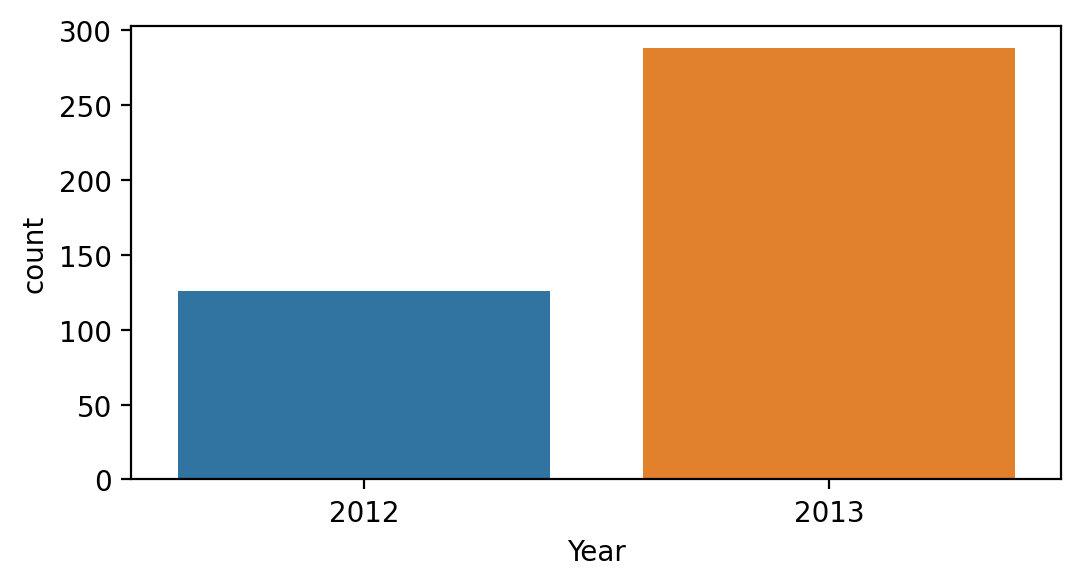

In [20]:
plt.figure(figsize=(6,3), dpi=200)
sns.countplot(data = df,x = 'Year');

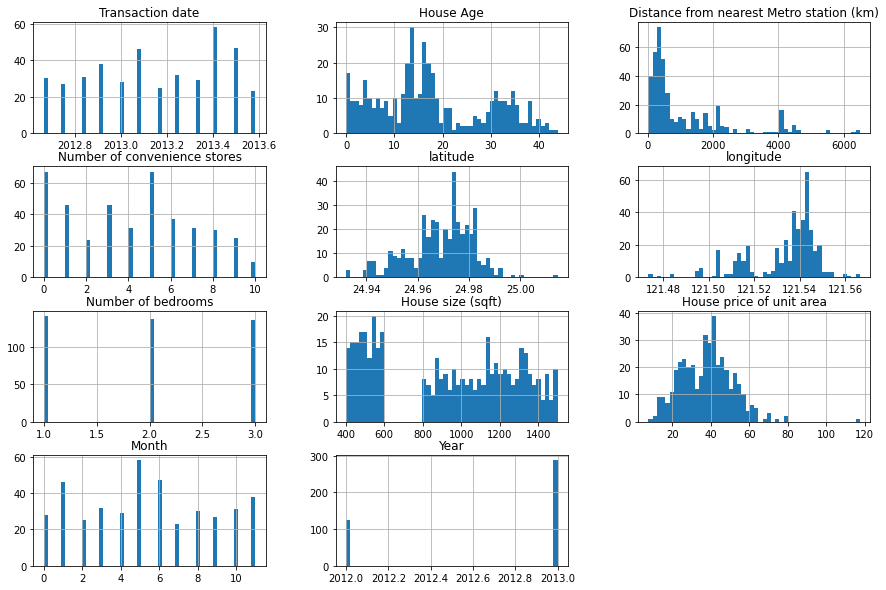

In [21]:
df.hist(bins=50,figsize=(15,10))
plt.show()

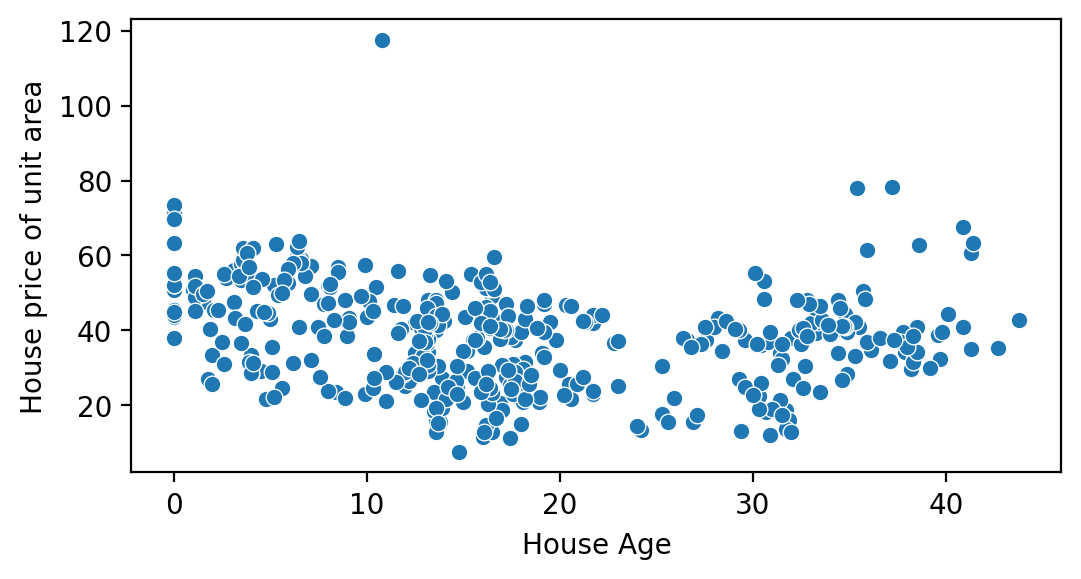

In [22]:
plt.figure(figsize=(6,3), dpi=200)
sns.scatterplot(data=df, x='House Age', y='House price of unit area');

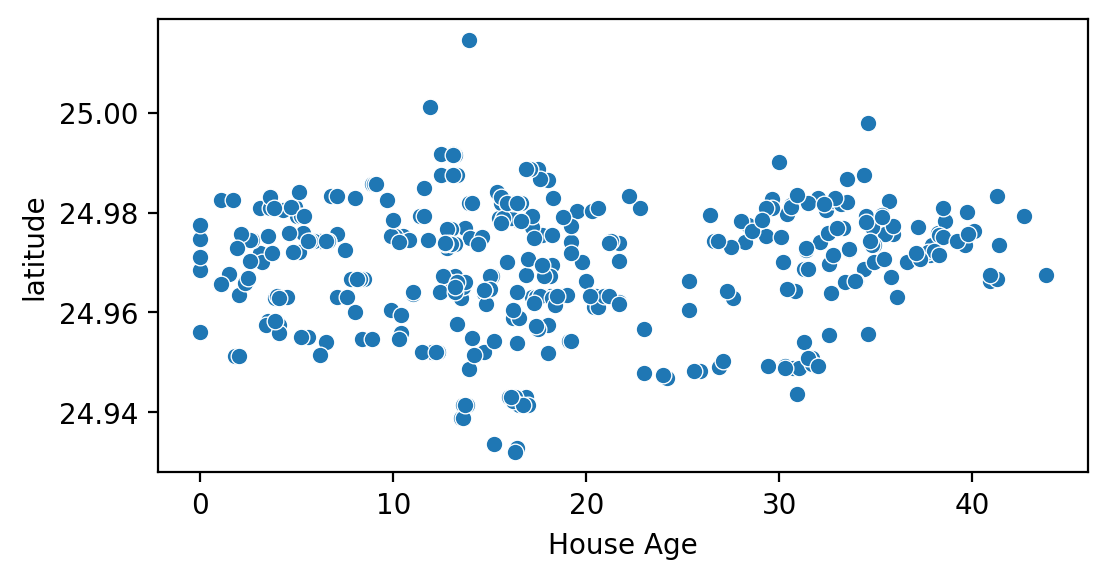

In [23]:
plt.figure(figsize=(6,3), dpi=200)
sns.scatterplot(data=df, x='House Age', y='latitude');

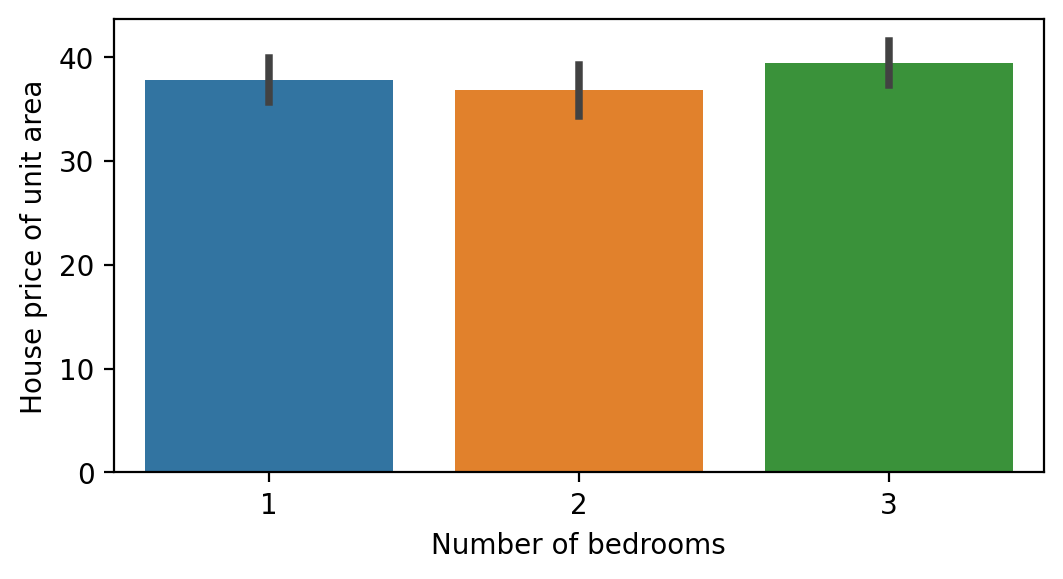

In [24]:
plt.figure(figsize=(6,3), dpi=200)
sns.barplot(data=df, x='Number of bedrooms', y='House price of unit area');

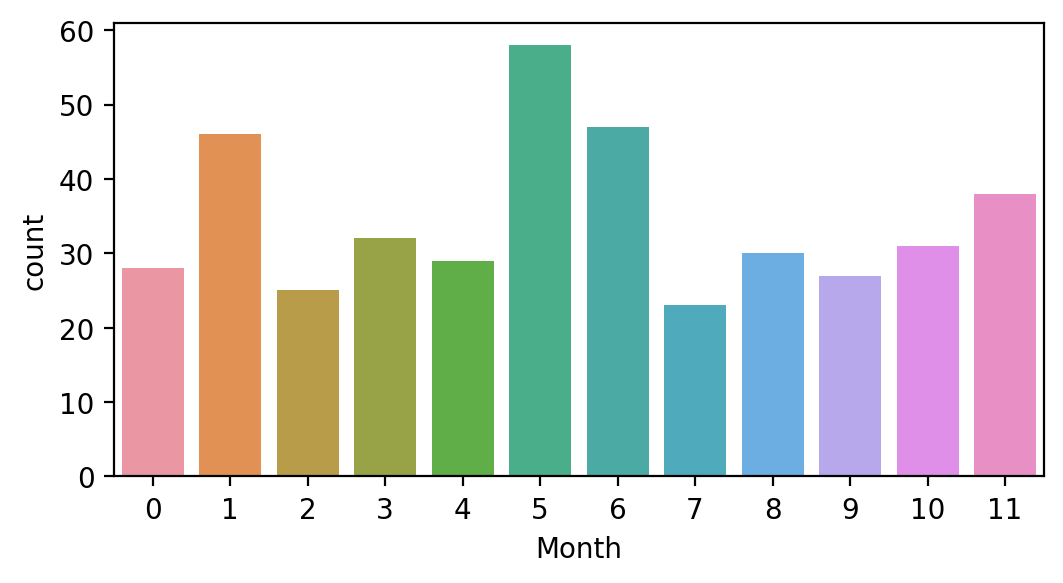

In [25]:
plt.figure(figsize=(6,3), dpi=200)
sns.countplot(data=df, x='Month');

In [26]:
df.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Month,Year
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529,-0.335471,0.817308
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567,-0.062836,0.049171
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613,0.033920,0.016519
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005,0.018684,-0.005586
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307,0.021770,0.008118
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287,-0.062640,0.013177
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265,0.015039,0.028743
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489,0.027330,0.025156
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000,-0.045723,0.081545
Month,-0.335471,-0.062836,0.033920,0.018684,0.021770,-0.062640,0.015039,0.027330,-0.045723,1.000000,-0.816994


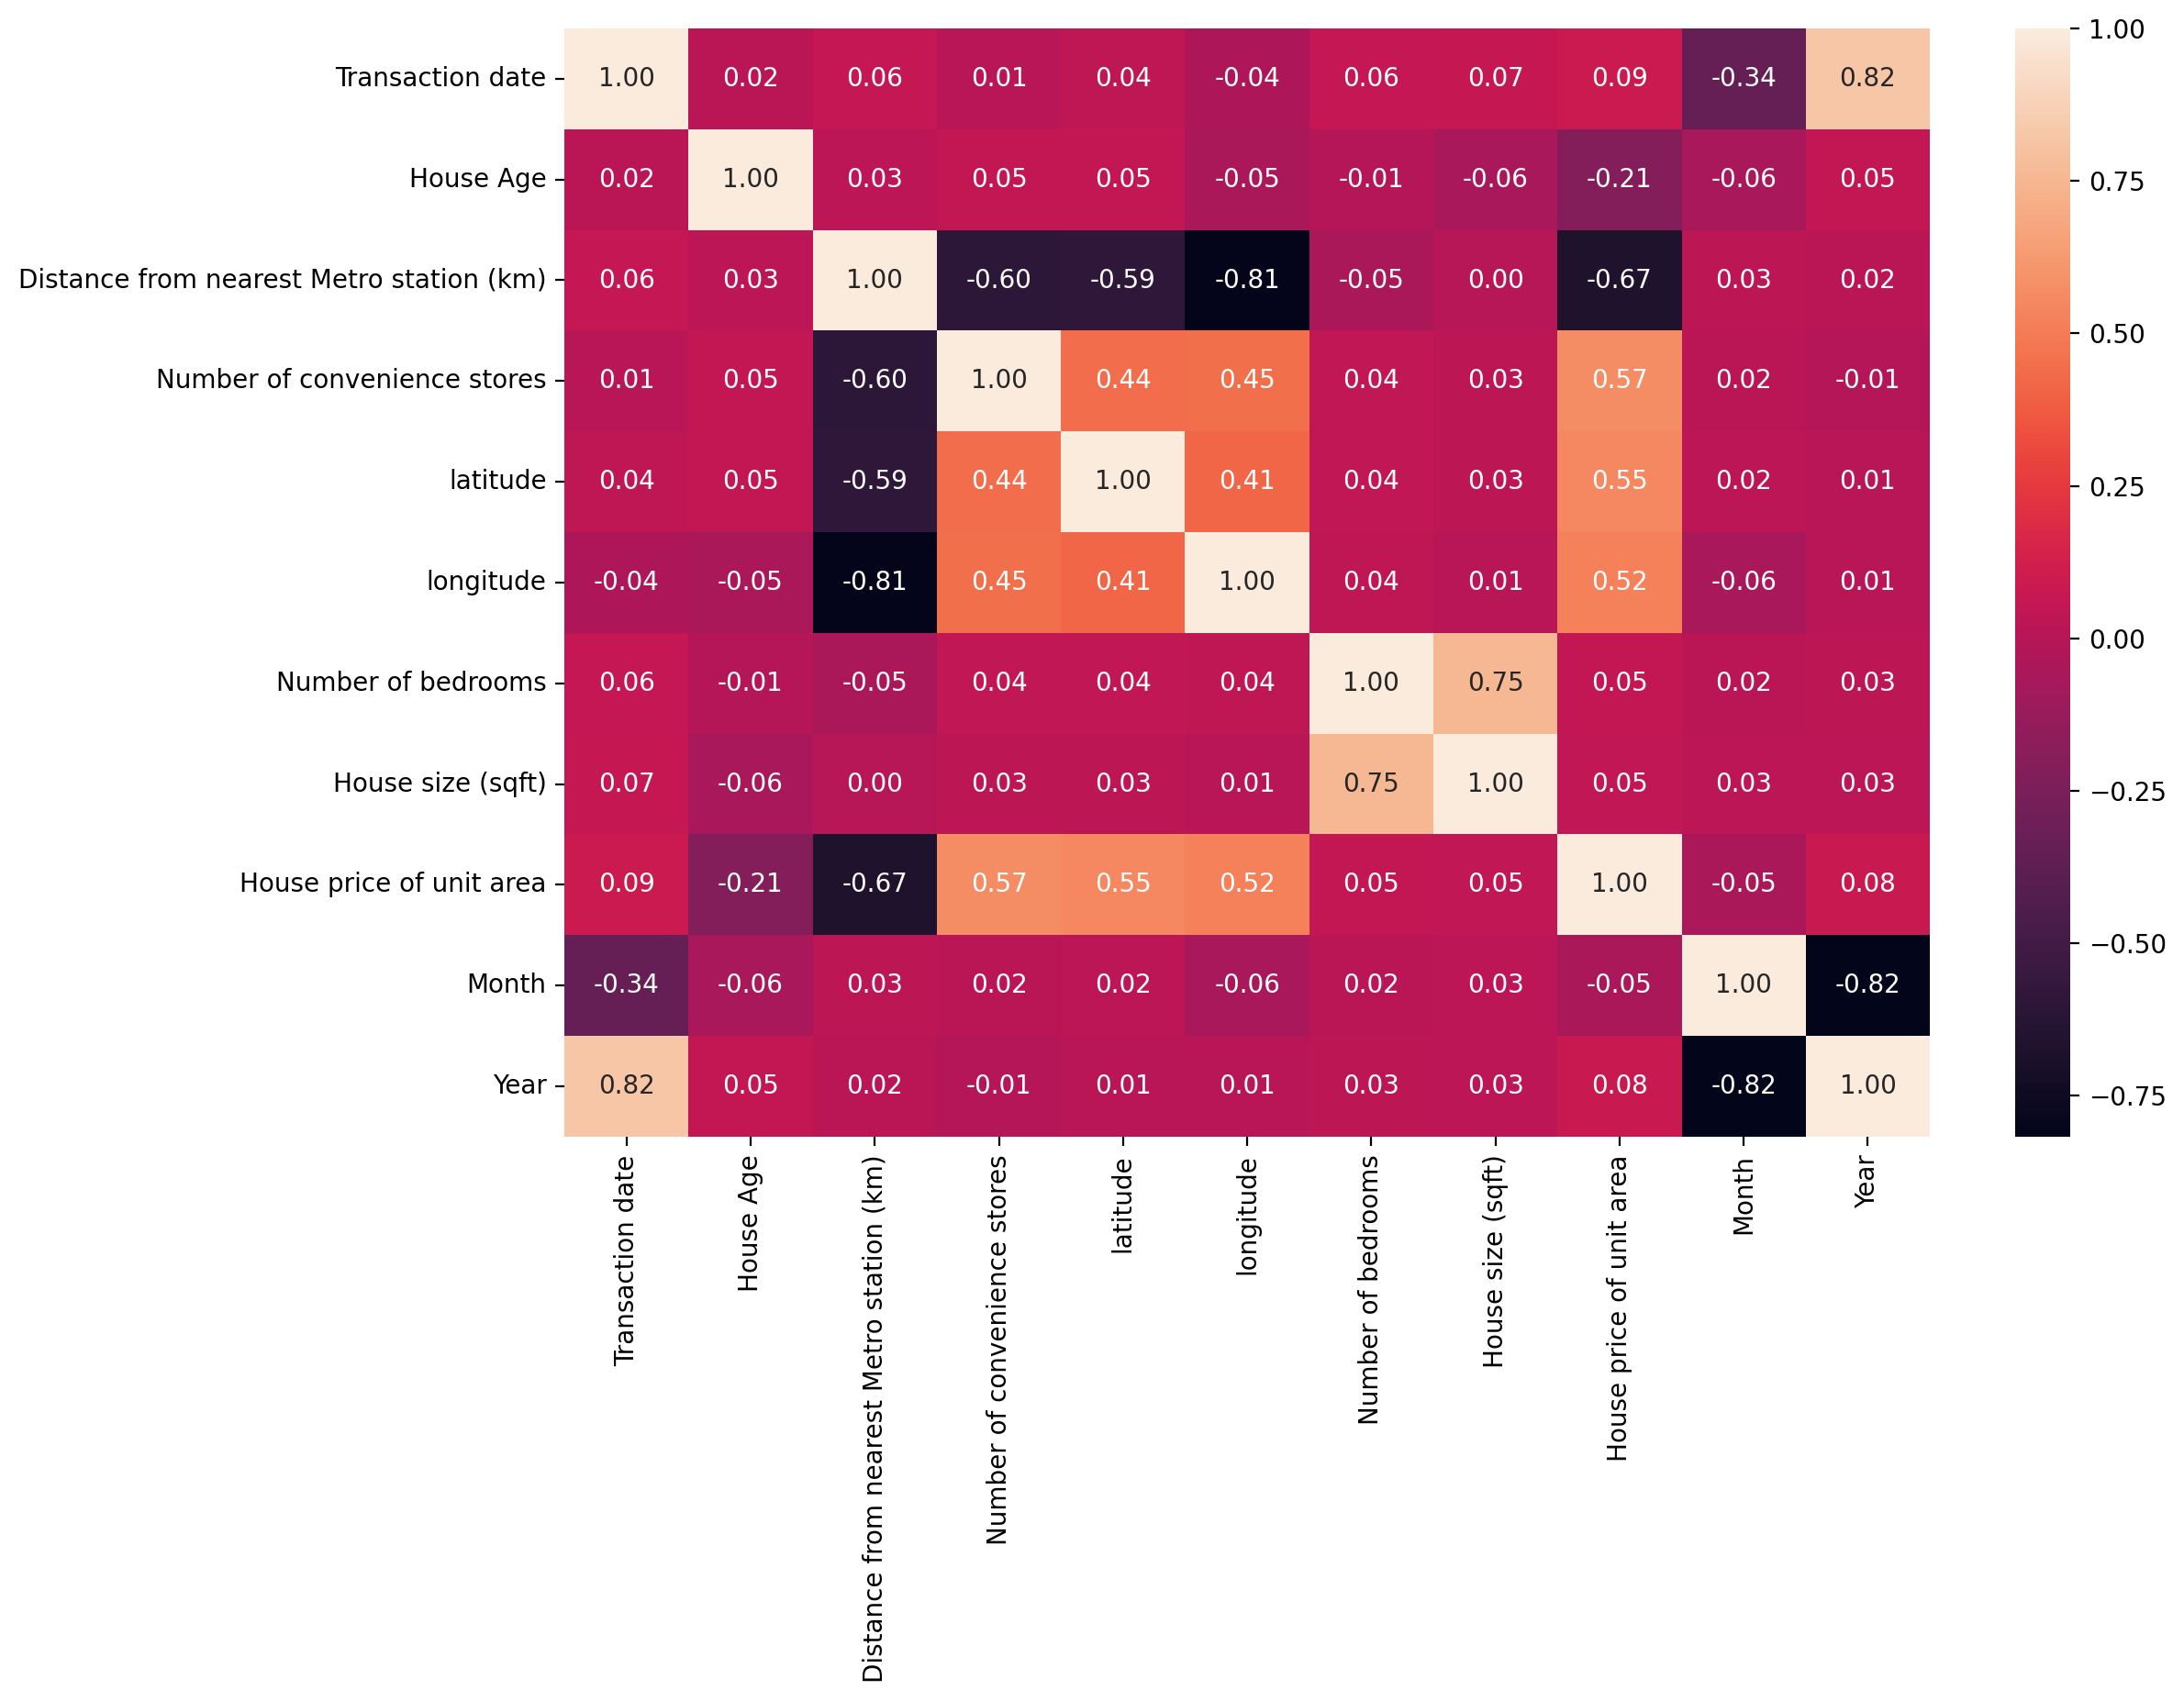

In [29]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df.corr(),annot=True, fmt='.2f');

We can see here that all the features excluding transaction date, month and year are important for our predictive modeling.

## Missing values and Outlier detection

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
 9   Month                                     414 non-null    int64  
 10  Year                                  

There are no missing values un this dataset

In [63]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Month,Year
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,2013.148507,17.729298,1085.898530,4.101695,24.969017,121.533368,1.987893,930.406780,37.787651,5.443099,2012.694915
std,0.282191,11.401205,1262.974876,2.945182,0.012422,0.015365,0.819868,348.653908,13.046097,3.384686,0.461002
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000,0.000000,2012.000000
25%,2012.916667,9.000000,289.324800,1.000000,24.962990,121.527600,1.000000,548.000000,27.700000,3.000000,2012.000000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.400000,5.000000,2013.000000
75%,2013.416667,28.200000,1455.798000,6.000000,24.977460,121.543310,3.000000,1234.000000,46.600000,8.000000,2013.000000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,78.300000,11.000000,2013.000000


In [31]:
# For the 1st feature 'House Age'
sigma = df['House Age'].std()
mean = df['House Age'].mean()

In [32]:
df[(df['House Age'] > mean + 3*sigma) & (df['House Age'] < mean - 3*sigma)]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Month,Year


There are no outliers in 'House Age' column

In [33]:
sigma = df['Distance from nearest Metro station (km)'].std()
mean = df['Distance from nearest Metro station (km)'].mean()

In [34]:
df[(df['Distance from nearest Metro station (km)'] > mean + 3*sigma) & (df['Distance from nearest Metro station (km)'] < mean - 3*sigma)]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Month,Year


There are no outliers in 'Distance from nearest Metro station (km)' column either

In [35]:
# There was one value in above scatterplot that shows us one datapoint as outlier
df[df['House price of unit area'] > 100]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Month,Year
270,2013.333333,10.8,252.5822,1,24.9746,121.53046,2,1373,117.5,4,2013


In [36]:
outlier = df[df['House price of unit area'] > 100].index

In [38]:
df.drop(outlier, axis=0, inplace=True)

In [39]:
# Corelation of price with different features
df.corr()['House price of unit area'].sort_values()

Distance from nearest Metro station (km)   -0.694009
House Age                                  -0.210985
Month                                      -0.041447
House size (sqft)                           0.029859
Number of bedrooms                          0.052269
Year                                        0.075405
Transaction date                            0.081757
longitude                                   0.549250
latitude                                    0.563954
Number of convenience stores                0.612635
House price of unit area                    1.000000
Name: House price of unit area, dtype: float64

# Different Model Building

In [40]:
X = df.drop(['Transaction date','Month','Year','House price of unit area'], axis=1)
y = df['House price of unit area']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=101)

In [43]:
# Using standard scaler to scale all the features to the same level
scaler = StandardScaler()

In [44]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr_model = LinearRegression()

lr_model.fit(scaled_X_train, y_train)

LinearRegression()

In [48]:
lr_model_predictions = lr_model.predict(scaled_X_test)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
# Evaluating the testing data with the use of different error metrics
MAE = mean_absolute_error(y_test, lr_model_predictions)
MSE = mean_squared_error(y_test, lr_model_predictions)
RMSE = np.sqrt(MSE)

In [51]:
MAE

5.974847592404272

In [52]:
MSE

72.44043069807293

In [53]:
RMSE

8.511194434277302

## Support Vector Machine

In [54]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [55]:
# Using Crossvalidation to extract the best parameter from model
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
             'gamma':['scale','auto'],
             'degree':[2,3,4],
             'epsilon':[0,0.01,0.1,0.5,1,2]}

In [56]:
svr_model = SVR()
grid = GridSearchCV(svr_model, param_grid=param_grid)

In [57]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [58]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 0, 'gamma': 'auto', 'kernel': 'rbf'}

In [59]:
grid_preds = grid.predict(scaled_X_test)

In [60]:
MAE = mean_absolute_error(y_test, grid_preds)
MSE = mean_squared_error(y_test, grid_preds)
RMSE = np.sqrt(MSE)

In [61]:
MAE

5.56895193056006

In [62]:
MSE

68.29236918496571

In [63]:
RMSE

8.263919722805014

In [64]:
# Fumction to run model directly
def run_model(model, X_train, y_train, X_test, y_test):
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Get metrics
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE: {mae}')
    mse = mean_squared_error(y_test, preds)
    print(f'MSE: {mse}')
    rmse = np.sqrt(mse)
    print(f'RMSE: {rmse}')

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor

trees = [10, 50, 100]

for n in trees:
    rf_model = RandomForestRegressor(n_estimators=n)
    print(f'No. of Trees: {n}')
    run_model(rf_model, X_train, y_train, X_test, y_test)
    print('\n')

No. of Trees: 10
MAE: 5.430120481927712
MSE: 58.60500000000001
RMSE: 7.655390257851001


No. of Trees: 50
MAE: 5.099325301204818
MSE: 49.788010987951786
RMSE: 7.05606200284208


No. of Trees: 100
MAE: 5.087493975903615
MSE: 48.03879814457832
RMSE: 6.931002679596822




## Gradinet Boosting

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

grb_model = GradientBoostingRegressor()

run_model(grb_model, X_train, y_train, X_test, y_test)

MAE: 4.78490978849286
MSE: 46.82660769742236
RMSE: 6.84299698212869


**Conclusion :- Although error metrics are same in all the models, Gradient Boosting Regressor model is performing slightly better than other models.**